In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [112]:
# load data

train=pd.read_csv("train_preprocessed.csv")
test=pd.read_csv("test_preprocessed.csv")

## **Training** (Decision Tree)

In [113]:
# split dependent and independent features

X_train=train.iloc[:,:-3]
y_train=train.iloc[:,-3:] # target feature

# split train.csv into 90% train 10% validation

X_train_90, X_val_10, y_train_90, y_val_10 = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [114]:
# training with decision tree classifier

dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

## **Prediction** (Validation Set)

In [115]:
# validation set

y_pred=dt.predict(X_val_10)
pred_df = pd.DataFrame(y_pred, columns=['56','57','58'])

In [116]:
accuracy = accuracy_score(y_val_10, y_pred)
precision = precision_score(y_val_10, y_pred, average='macro')
recall = recall_score(y_val_10, y_pred, average='macro')
f1 = f1_score(y_val_10, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.8387096774193549
Precision: 0.8782116294793779
Recall: 0.8342414995640802
F1: 0.8514180264180263


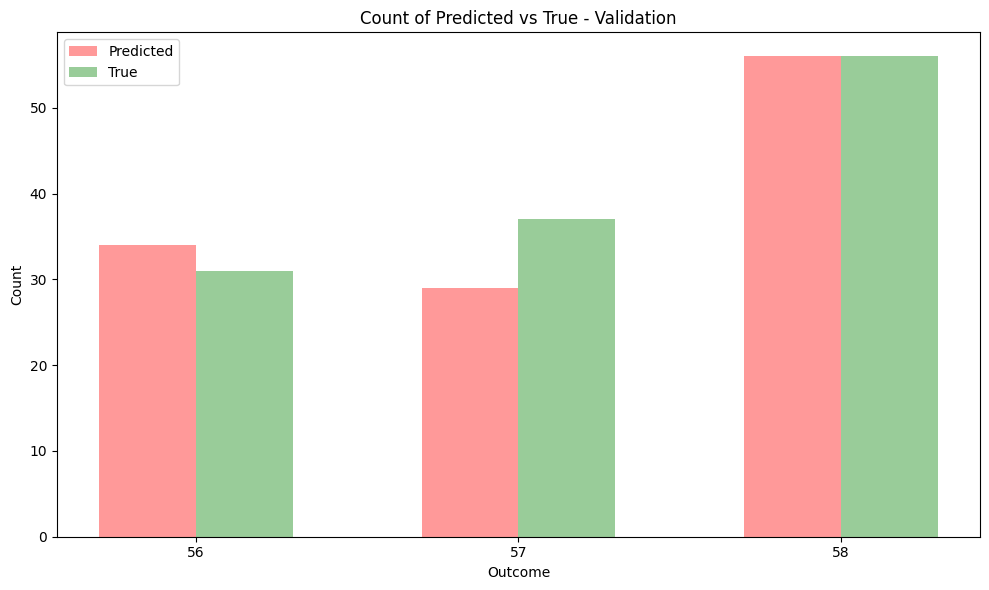

In [117]:
plt.figure(figsize=(10, 6))

bar_width = 0.3

index = np.arange(len(pred_df.columns))

plt.bar(index, pred_df.sum(), bar_width, label='Predicted', color='red', alpha=0.4)

plt.bar(index + bar_width, y_val_10.sum(), bar_width, label='True', color='green', alpha=0.4)

plt.title('Count of Predicted vs True - Validation')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(index + bar_width / 2, pred_df.columns)
plt.legend()

plt.tight_layout()
plt.show()

## **Prediction** (Test Set)

In [118]:
test_pred=dt.predict(test)
test_pred_df = pd.DataFrame(test_pred, columns=['died','euthanized','lived'])

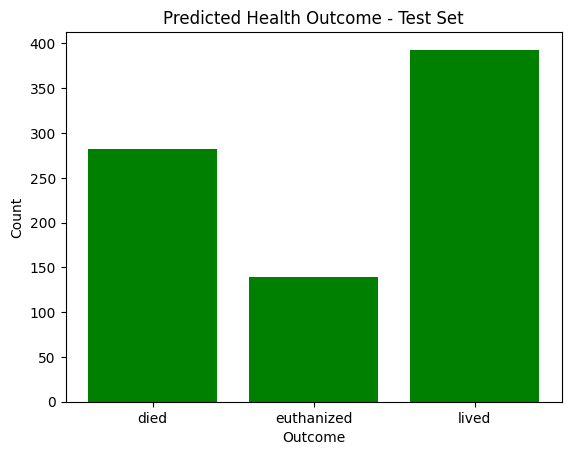

In [119]:
count=[test_pred_df["died"].sum(),test_pred_df["euthanized"].sum(),test_pred_df["lived"].sum()]
outcomes = ["died", "euthanized", "lived"]

plt.bar(outcomes, count, color='green')

plt.title('Predicted Health Outcome - Test Set')
plt.xlabel('Outcome')
plt.ylabel('Count')

plt.show()

In [120]:
# submission file

test_id=pd.read_csv("test.csv",usecols=["id"])

final_results_test=pd.concat([test_id, test_pred_df], axis=1)

for index, row in final_results_test.iterrows():
    if row["died"] == 1:
        final_results_test.loc[index, "outcome"] = "died"
    elif row["euthanized"] == 1:
        final_results_test.loc[index, "outcome"] = "euthanized"
    elif row["lived"] == 1:
        final_results_test.loc[index, "outcome"] = "lived"

final_results_test=final_results_test.drop(["died","euthanized","lived"],axis=1)

final_results_test.to_csv('submission_file.csv', index=False)